In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score,\
    confusion_matrix, precision_recall_curve, roc_curve

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [67]:
def get_clf_eval(Y_test, pred, pred_proba=None):
    confusion = confusion_matrix(Y_test, pred)
    acc = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    f1 = f1_score(Y_test, pred)
    roc_auc = roc_auc_score(Y_test, pred_proba)
    print('Confusion matrix')
    print(confusion)
    print('acc: {:.4f}, precision: {:.4f}, recall: {:.4f}, F1: {:.4f}, roc_auc: {:.4f}'.format(acc, precision, recall, f1, roc_auc))
    # print(f'acc: {acc:.4f}, precision: {precision:.4f}, recall: {recall:.4f}, F1: {f1:.4f}')


def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

def get_eval_by_threshold(Y_test, pred_proba, thresholds):
    for i in thresholds:
        binarizer = Binarizer(threshold=i)
        custom_predict = binarizer.fit_transform(pred_proba)
        print('threshold: {}'.format(i))
        get_clf_eval(Y_test, custom_predict, pred_proba)
        print()

In [60]:
diabetes_data = pd.read_csv('./kaggle/pima/diabetes.csv')

X = diabetes_data.iloc[:, :-1]
Y = diabetes_data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=156, stratify=y)
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, Y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]


In [48]:
get_clf_eval(Y_test, pred, pred_proba)

Confusion matrix
[[87 13]
 [22 32]]
acc: 0.7727, precision: 0.7111, recall: 0.5926, F1: 0.6465, roc_auc: 0.8083


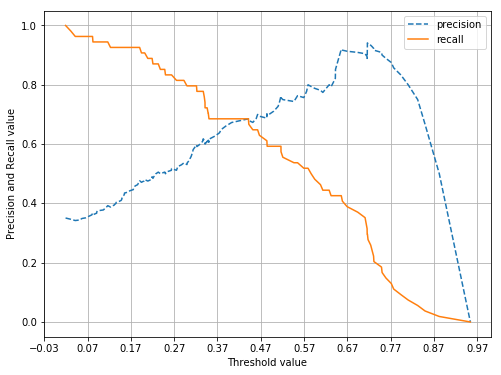

In [49]:
precision_recall_curve_plot(Y_test, pred_proba)

In [61]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = diabetes_data['Glucose'].count()
for f in zero_features:
    zero_count = diabetes_data[diabetes_data[f]==0][f].count()
    print('{} = 0 건수: {}, {:.2f} %'.format(f, zero_count, zero_count/total_count*100))
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

Glucose = 0 건수: 5, 0.65 %
BloodPressure = 0 건수: 35, 4.56 %
SkinThickness = 0 건수: 227, 29.56 %
Insulin = 0 건수: 374, 48.70 %
BMI = 0 건수: 11, 1.43 %


In [62]:
X = diabetes_data.iloc[:, :-1]
Y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, Y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]


In [52]:
get_clf_eval(Y_test, pred, pred_proba)

Confusion matrix
[[90 10]
 [21 33]]
acc: 0.7987, precision: 0.7674, recall: 0.6111, F1: 0.6804, roc_auc: 0.8433


In [68]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
get_eval_by_threshold(Y_test, pred_proba.reshape(-1 ,1), thresholds)

threshold: 0.3
Confusion matrix
[[65 35]
 [11 43]]
acc: 0.7013, precision: 0.5513, recall: 0.7963, F1: 0.6515, roc_auc: 0.8433

threshold: 0.33
Confusion matrix
[[71 29]
 [11 43]]
acc: 0.7403, precision: 0.5972, recall: 0.7963, F1: 0.6825, roc_auc: 0.8433

threshold: 0.36
Confusion matrix
[[76 24]
 [15 39]]
acc: 0.7468, precision: 0.6190, recall: 0.7222, F1: 0.6667, roc_auc: 0.8433

threshold: 0.39
Confusion matrix
[[78 22]
 [16 38]]
acc: 0.7532, precision: 0.6333, recall: 0.7037, F1: 0.6667, roc_auc: 0.8433

threshold: 0.42
Confusion matrix
[[84 16]
 [18 36]]
acc: 0.7792, precision: 0.6923, recall: 0.6667, F1: 0.6792, roc_auc: 0.8433

threshold: 0.45
Confusion matrix
[[85 15]
 [18 36]]
acc: 0.7857, precision: 0.7059, recall: 0.6667, F1: 0.6857, roc_auc: 0.8433

threshold: 0.48
Confusion matrix
[[88 12]
 [19 35]]
acc: 0.7987, precision: 0.7447, recall: 0.6481, F1: 0.6931, roc_auc: 0.8433

threshold: 0.5
Confusion matrix
[[90 10]
 [21 33]]
acc: 0.7987, precision: 0.7674, recall: 0.6111,

In [70]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba.reshape(-1, 1))
get_clf_eval(Y_test, pred_th_048, pred_proba)

Confusion matrix
[[88 12]
 [19 35]]
acc: 0.7987, precision: 0.7447, recall: 0.6481, F1: 0.6931, roc_auc: 0.8433
